In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3748,6339-RZCBJ,Male,0,No,No,48,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),78.90,3771.5,No
1513,0661-XEYAN,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,25.80,25.8,Yes
6851,8465-SBRXP,Male,0,Yes,Yes,38,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),94.90,3616.25,No
4740,2778-OCLGR,Male,1,Yes,No,24,No,No phone service,DSL,Yes,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),39.10,971.3,Yes
5179,9048-JVYVF,Male,0,No,No,3,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,191.35,Yes


In [8]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
#convert string to integer
pd.to_numeric(df.TotalCharges)
# here we get error because the dataset contains blank space which cannot be converted to integer

ValueError: Unable to parse string " " at position 488

In [17]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [13]:
df.iloc[488]['TotalCharges']

' '

In [14]:
df1 = df[df.TotalCharges!=' ']

In [15]:
df1.shape

(7032, 20)

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\hp\AppData\Local\Temp\ipykernel_16592\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

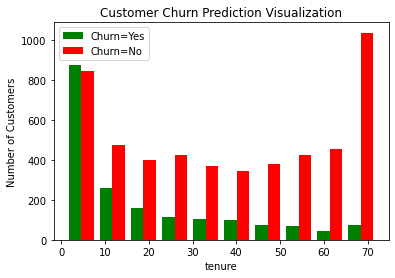

In [20]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

In [21]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}:{df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [23]:
df1.replace("No internet service",'No',inplace=True)
df1.replace("No phone service",'No',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16592\880368067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service",'No',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16592\880368067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service",'No',inplace=True)


In [24]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [25]:
# convert yes and no to number 
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16592\1954821304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [26]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [27]:
 for column in df1:
    print(f'{column}:{df1[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [28]:
df1['gender'].replace({'Female':1,"Male": 0},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16592\2509479039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,"Male": 0},inplace=True)


In [29]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [30]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [31]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5389,1,0,1,0,51,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4500,0,0,1,1,61,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
4538,1,0,0,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2062,1,0,0,0,66,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [40]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cels_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cels_to_scale] = scaler.fit_transform(df2[cels_to_scale])

In [34]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5980,1,0,0,0,0.225352,1,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1508,1,1,1,1,0.309859,1,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
3196,1,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [35]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [37]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [39]:
x_train.shape

(5625, 26)

In [61]:
x_test.shape

(1407, 26)

In [62]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [63]:
len(x_train.columns)

26

In [40]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
#    input layer is having 26 neurons hence esch neuron in the input is excepting one feature
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 2s 3ms/step - loss: 0.5725 - accuracy: 0.6828
Epoch 2/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4479 - accuracy: 0.7842
Epoch 3/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.7916
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8002
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8043
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8071
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8075
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4108 - accuracy: 0.8080
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8094
Epoch 10/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4083 - accuracy: 0.8085

In [41]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4405 - accuracy: 0.7861


[0.440540075302124, 0.7860696315765381]

In [42]:
yp = model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


array([[0.24932823],
       [0.46796793],
       [0.02079971],
       [0.71687084],
       [0.5004322 ]], dtype=float32)

In [43]:
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [44]:
y_pred[:5]

[0, 0, 0, 1, 1]

Text(69.0, 0.5, 'Truth')

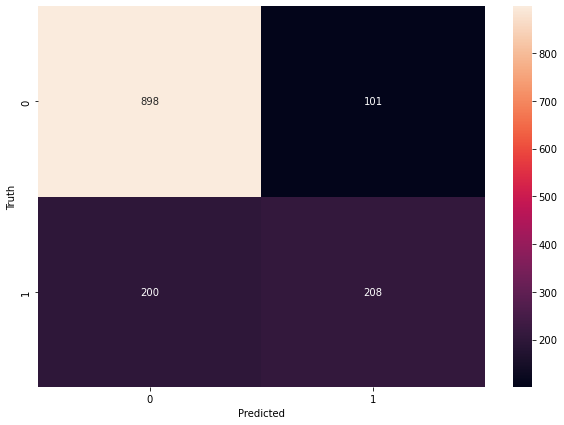

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
# total accuracy

round((899+210)/(898+101+198+210),2)

0.79

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.67      0.51      0.58       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [82]:
def ANN(x_train,y_train,x_test,y_test,loss,weight):
    model = keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        keras.layers.Dense(26,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
    ])
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    if weight == -1:
        model.fit(x_train,y_train,epochs=100)
    else:
         model.fit(x_train,y_train,epochs=100,class_weight=weights)
            
    print(model.evaluate(x_test,y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print('Classification Report :\n',classification_report(y_test,y_preds))
    
    return y_pred

In [83]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6126 - accuracy: 0.7050
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.7645
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.7696
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7739
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.7729
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4741 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7719
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8140
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8174
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.8124
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8184
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8194
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8187
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8171
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8181
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8214
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8137
Epoch 93/100


In [60]:
# class count
count_class_0,count_class_1 = df1.Churn.value_counts()

# devide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [69]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis = 0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [68]:
df_test_under.shape

(3738, 27)

In [79]:
x = df_test_under.drop('Churn',axis ='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)

In [80]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [84]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.5815 - accuracy: 0.7040
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5038 - accuracy: 0.7622
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7686
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.7686
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.7759
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7736
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8107
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8161
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8207
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8187
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8154
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8181
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.8161
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8244
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8217
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3857 - accuracy: 0.8231
Epoch 93/100


In [86]:
count_class_0,count_class_1

(5163, 1869)

In [87]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

In [91]:
df_test_over=shape=pd.concat([df_class_0,df_class_1_over],axis=0)

In [92]:
df_test_over.shape

(10326, 27)

In [94]:
print('Random under-sampling:')
print(df_test_over.Churn.value_counts())

Random under-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [95]:
x = df_test_over.drop('Churn',axis ='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)

In [98]:
y_train.value_counts(),y_test.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [99]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5300 - accuracy: 0.7415
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4888 - accuracy: 0.7651
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4825 - accuracy: 0.7650
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.7688
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.7702
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4699 - accuracy: 0.7736
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4679 - accuracy: 0.7736
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.7755
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4604 - accuracy: 0.7754
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4571 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3577 - accuracy: 0.8409
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3564 - accuracy: 0.8424
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3551 - accuracy: 0.8431
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.8420
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3531 - accuracy: 0.8487
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8425
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.8464
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8458
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.8442
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 

In [106]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [110]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)

In [117]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [118]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5429 - accuracy: 0.7321
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.7782
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4610 - accuracy: 0.7787
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4547 - accuracy: 0.7847
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.7877
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4461 - accuracy: 0.7897
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4420 - accuracy: 0.7941
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.7943
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4333 - accuracy: 0.7988
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4317 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3355 - accuracy: 0.8504
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3370 - accuracy: 0.8517
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3353 - accuracy: 0.8522
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8507
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3350 - accuracy: 0.8504
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3362 - accuracy: 0.8502
Epoch 87/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.8515
Epoch 88/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3323 - accuracy: 0.8516
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8531
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3326 - accuracy: 

In [143]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

0

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)

In [122]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [125]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [126]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [127]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [135]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[:1495],df_minority],axis=0)
    
    x_train = df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn

    return x_train,y_train

In [140]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)

y_pred1 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6179 - accuracy: 0.6786
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7535
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4962 - accuracy: 0.7642
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.7722
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4808 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.7753
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.7776
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.8211
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3823 - accuracy: 0.8211
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8217
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.8261
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8268
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3815 - accuracy: 0.8304
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3798 - accuracy: 0.8271
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8271
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8334
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3758 - accuracy: 0.8298
Epoch 93/100


In [141]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)

y_pred2 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.5938 - accuracy: 0.7033
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.7699
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.7712
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.7706
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.7763
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8177
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3873 - accuracy: 0.8181
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8268
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.8241
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3830 - accuracy: 0.8241
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8274
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8271
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.8224
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8258
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8197
Epoch 93/100


In [142]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)

y_pred3 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6110 - accuracy: 0.7020
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5133 - accuracy: 0.7635
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.7689
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7722
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4718 - accuracy: 0.7749
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8174
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.8191
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8217
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8207
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.8211
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3950 - accuracy: 0.8194
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8207
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8231
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.8261
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3909 - accuracy: 0.8264
Epoch 93/100


In [149]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [150]:
print(classification_report(y_test,y_pred_final))



# Hence SMOTE works well

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1033
           1       0.27      0.22      0.25       374

    accuracy                           0.63      1407
   macro avg       0.50      0.50      0.50      1407
weighted avg       0.61      0.63      0.62      1407

